In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Reshape((-1, 64)))

model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation='tanh', return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation='tanh', return_sequences=True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_BiGRU_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN_BiGRU.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_BiGRU_graph.png")
plt.show()

print("The End")

In [5]:
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

Default GPU Device:/device:GPU:0


In [6]:
tf.device('/device:GPU:0')

In [8]:
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 64)       0         
 2D)       

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25


2023-04-25 05:54:23.543483: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 517s 3s/step - loss: 2.8037 - accuracy: 0.0994 - val_loss: 2.4407 - val_accuracy: 0.1785
Epoch 2/25
192/192 [==============================] - 489s 3s/step - loss: 2.0948 - accuracy: 0.2885 - val_loss: 1.7576 - val_accuracy: 0.4180
Epoch 3/25
192/192 [==============================] - 480s 3s/step - loss: 1.5548 - accuracy: 0.4847 - val_loss: 1.1914 - val_accuracy: 0.6176
Epoch 4/25
192/192 [==============================] - 479s 2s/step - loss: 1.0423 - accuracy: 0.6637 - val_loss: 1.0402 - val_accuracy: 0.6500
Epoch 5/25
192/192 [==============================] - 488s 3s/step - loss: 0.7975 - accuracy: 0.7447 - val_loss: 0.8435 - val_accuracy: 0.7195
Epoch 6/25
192/192 [==============================] - 481s 3s/step - loss: 0.7325 - accuracy: 0.7685 - val_loss: 0.7050 - val_accuracy: 0.7699
Epoch 7/25
192/192 [==============================] - 482s 3s/step - loss: 0.6929 - accuracy: 0.7842 - val_loss: 0.6881 - val_accuracy: 0.7787
Epoch 8/25

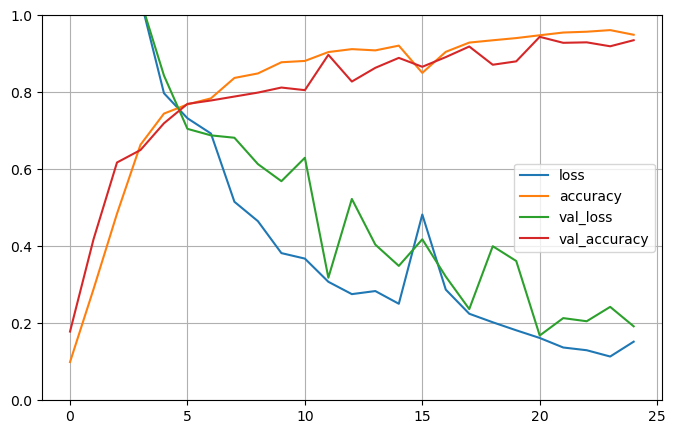

The End


In [9]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Reshape((-1, 64)))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh', return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, activation='tanh', return_sequences=True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_BiLSTM_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN_BiLSTM.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_BiLSTM_graph.png")
plt.show()

print("The End")

start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dro

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25


2023-04-25 13:33:55.745332: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 535s 3s/step - loss: 2.6900 - accuracy: 0.1748 - val_loss: 1.9664 - val_accuracy: 0.4066
Epoch 2/25
192/192 [==============================] - 492s 3s/step - loss: 1.5843 - accuracy: 0.5151 - val_loss: 1.0669 - val_accuracy: 0.6953
Epoch 3/25
192/192 [==============================] - 492s 3s/step - loss: 0.9133 - accuracy: 0.7227 - val_loss: 0.4575 - val_accuracy: 0.8863
Epoch 4/25
192/192 [==============================] - 502s 3s/step - loss: 0.5326 - accuracy: 0.8409 - val_loss: 0.2878 - val_accuracy: 0.9258
Epoch 5/25
192/192 [==============================] - 494s 3s/step - loss: 0.3791 - accuracy: 0.8890 - val_loss: 0.2082 - val_accuracy: 0.9447
Epoch 6/25
192/192 [==============================] - 493s 3s/step - loss: 0.3023 - accuracy: 0.9129 - val_loss: 0.1688 - val_accuracy: 0.9555
Epoch 7/25
192/192 [==============================] - 491s 3s/step - loss: 0.2482 - accuracy: 0.9265 - val_loss: 0.1876 - val_accuracy: 0.9451
Epoch 8/25

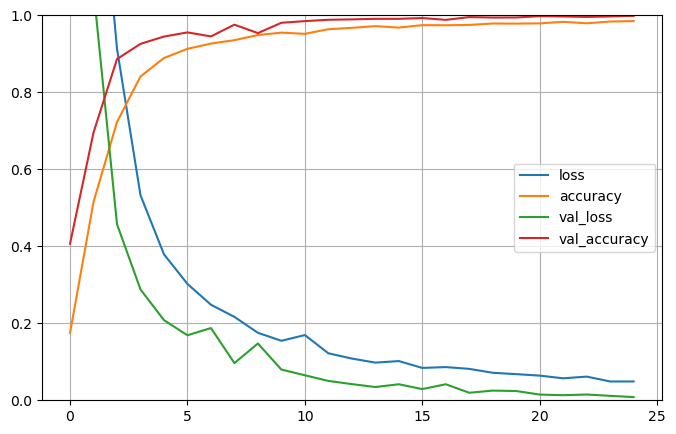

The End


In [1]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/spectrogram/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_graph.png")
plt.show()

print("The End")

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation='tanh', return_sequences=True), input_shape=(1000, 64)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(32, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('BiGRU_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("BiGRU_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('BiGRU_graph.png')
plt.show()

print('The End')

start
File Loading
(12227, 20) [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.Bidirectiornal(keras.layers.LSTM(128, activation='tanh', return_sequences=True), input_shape=(1000, 64)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('BiLSTM_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("BiLSTM_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('BiLSTM_graph.png')
plt.show()

print('The End')

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.GRU(128, activation='tanh', return_sequences=True, input_shape=(1000, 64)))
model.add(keras.layers.GRU(64, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(64, activation='tanh'))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('GRU_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("GRU_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('GRU_graph.png')
plt.show()

print('The End')

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    print(epochid)
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(1000, 64)))
model.add(keras.layers.LSTM(64, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(64, activation='tanh'))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('LSTM_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[checkpoint_cb])
model.save("LSTM_model.h5")

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("LSTM_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('LSTM_graph.png')
plt.show()

print('The End')

start
File Loading
(12227, 20) [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
epoch000001
epoch000002
epoch000003
epoch000004
epoch000005
epoch000006
epoch000007
epoch000008
epoch000009
epoch000010
epoch000011
epoch000012
epoch000013
epoch000014
epoch000015
epoch000016
epoch000017
epoch000018
epoch000019
epoch000020
epoch000021
epoch000022
epoch000023
epoch000024
epoch000025
epoch000026
epoch000027
epoch000028
epoch000029
epoch000030
epoch000031
epoch000032
epoch000033
epoch000034
epoch000035
epoch000036
epoch000037
epoch000038
epoch000039
epoch000040
epoch000041
epoch000042
epoch000043
epoch000044
epoch000045
epoch000046
epoch000047
epoch000048
epoch000049
epoch000050
epoch000051
epoch000052
epoch000053
epoch000054
epoch000055
epoch000056
epoch000057
epoch000058
epoch000059
epoch000060
epoch000061
epoch000062
epoch000063
epoch000064
epoch000065
epoch000066
epoch000067
epoch000068
epoch000069
epoch000070
epoch0000